<a href="https://colab.research.google.com/github/rmanicav/Data-science-projects/blob/main/cifar_100_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Assignment: CIFAR-100 Image Classification**

Your task is to apply the concepts and techniques learned in this Fashion-MNIST project to the CIFAR-100 dataset. CIFAR-100 is a dataset consisting of 60,000 32x32 color images in 100 classes, with 600 images per class. There are 50,000 training images and 10,000 test images.

In [2]:
#import libararies
from tensorflow.keras.datasets import cifar100

# Load dataset (100 fine-grained classes)
(x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode='fine')

# Print shapes
print("Train:", x_train.shape, y_train.shape)
print("Test :", x_test.shape, y_test.shape)


Train: (50000, 32, 32, 3) (50000, 1)
Test : (10000, 32, 32, 3) (10000, 1)


In [3]:
#Preprocess
#normalize
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [4]:
import numpy as np

# y_train shape: (50000, 1)
num_classes = len(np.unique(y_train))

print("Number of classes:", num_classes)


Number of classes: 100


In [5]:
# one-hot encode
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

print(y_train.shape)
print(y_test.shape)


(50000, 100)
(10000, 100)


In [6]:
#ANN Model Summary
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout

ann_model = Sequential([
    Flatten(input_shape=(32, 32, 3)),   # RGB images
    Dense(1024, activation='relu'),
    Dropout(0.5),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')  # 100 classes
])

ann_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

ann_model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │     3,146,752 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 100)            │        51,300 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,722,852 (14.20 MB)

 Trainable params: 3,722,852 (14.20 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
#CNN model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Conv2D, MaxPooling2D,
    Dense, Flatten, Dropout, BatchNormalization
)

cnn_model = Sequential([
    # Block 1
    Conv2D(32, (3,3), activation='relu', padding='same',
           input_shape=(32, 32, 3)),
    BatchNormalization(),
    Conv2D(32, (3,3), activation='relu', padding='same'),
    MaxPooling2D((2,2)),
    Dropout(0.25),

    # Block 2
    Conv2D(64, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(64, (3,3), activation='relu', padding='same'),
    MaxPooling2D((2,2)),
    Dropout(0.25),

    # Block 3
    Conv2D(128, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    Dropout(0.25),

    # Classifier
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

cnn_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

cnn_model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 512)            │     1,049,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 100)            │        51,300 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,240,708 (4.73 MB)

 Trainable params: 1,240,260 (4.73 MB)

 Non-trainable params: 448 (1.75 KB)

In [8]:
#deep CNN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Conv2D, MaxPooling2D,
    Dense, Flatten, Dropout, BatchNormalization
)
from tensorflow.keras.optimizers import Adam

deep_cnn = Sequential([

    # -------- Block 1 --------
    Conv2D(64, (3,3), padding='same', activation='relu',
           input_shape=(32, 32, 3)),
    BatchNormalization(),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    Dropout(0.25),

    # -------- Block 2 --------
    Conv2D(128, (3,3), padding='same', activation='relu'),
    BatchNormalization(),
    Conv2D(128, (3,3), padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    Dropout(0.30),

    # -------- Block 3 --------
    Conv2D(256, (3,3), padding='same', activation='relu'),
    BatchNormalization(),
    Conv2D(256, (3,3), padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    Dropout(0.40),

    # -------- Classifier --------
    Flatten(),
    Dense(1024, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

deep_cnn.compile(
    optimizer=Adam(learning_rate=1e-3),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

deep_cnn.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)               │ (None, 32, 32, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 32, 32, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 16, 16, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 16, 16, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 16, 16, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 8, 8, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 8, 8, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 8, 8, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 8, 8, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1024)           │     4,195,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 1024)           │         4,096 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 5,450,916 (20.79 MB)

 Trainable params: 5,447,076 (20.78 MB)

 Non-trainable params: 3,840 (15.00 KB)

In [9]:
#earlysleeping and checkpoint
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

def get_callbacks(model_name):
    return [
        EarlyStopping(
            monitor='val_loss',
            patience=10,
            restore_best_weights=True,
            verbose=1
        ),
        ModelCheckpoint(
            filepath=f"{model_name}.h5",
            monitor='val_loss',
            save_best_only=True,
            verbose=1
        )
    ]


In [10]:
#ANN
print("Training ANN model...")

ann_history = ann_model.fit(
    x_train, y_train,
    epochs=10,
    batch_size=128,
    validation_split=0.2,
    callbacks=get_callbacks("ann_cifar100"),
    verbose=2
)


Training ANN model...
Epoch 1/10

Epoch 1: val_loss improved from inf to 4.24011, saving model to ann_cifar100.h5


313/313 - 29s - 91ms/step - accuracy: 0.0252 - loss: 4.4959 - val_accuracy: 0.0608 - val_loss: 4.2401
Epoch 2/10

Epoch 2: val_loss improved from 4.24011 to 4.14260, saving model to ann_cifar100.h5


313/313 - 26s - 82ms/step - accuracy: 0.0408 - loss: 4.2863 - val_accuracy: 0.0730 - val_loss: 4.1426
Epoch 3/10

Epoch 3: val_loss improved from 4.14260 to 4.09328, saving model to ann_cifar100.h5


313/313 - 27s - 85ms/step - accuracy: 0.0488 - loss: 4.2130 - val_accuracy: 0.0771 - val_loss: 4.0933
Epoch 4/10

Epoch 4: val_loss improved from 4.09328 to 4.09134, saving model to ann_cifar100.h5


313/313 - 28s - 89ms/step - accuracy: 0.0521 - loss: 4.1724 - val_accuracy: 0.0740 - val_loss: 4.0913
Epoch 5/10

Epoch 5: val_loss improved from 4.09134 to 4.04625, saving model to ann_cifar100.h5


313/313 - 40s - 128ms/step - accuracy: 0.0587 - loss: 4.1366 - val_accuracy: 0.0876 - val_loss: 4.0462
Epoch 6/10

Epoch 6: val_loss improved from 4.04625 to 4.04198, saving model to ann_cifar100.h5


313/313 - 26s - 82ms/step - accuracy: 0.0602 - loss: 4.1187 - val_accuracy: 0.0937 - val_loss: 4.0420
Epoch 7/10

Epoch 7: val_loss improved from 4.04198 to 4.03989, saving model to ann_cifar100.h5


313/313 - 42s - 136ms/step - accuracy: 0.0623 - loss: 4.0975 - val_accuracy: 0.0879 - val_loss: 4.0399
Epoch 8/10

Epoch 8: val_loss improved from 4.03989 to 4.00199, saving model to ann_cifar100.h5


313/313 - 27s - 87ms/step - accuracy: 0.0649 - loss: 4.0823 - val_accuracy: 0.1012 - val_loss: 4.0020
Epoch 9/10

Epoch 9: val_loss did not improve from 4.00199
313/313 - 28s - 90ms/step - accuracy: 0.0677 - loss: 4.0654 - val_accuracy: 0.0900 - val_loss: 4.0169
Epoch 10/10

Epoch 10: val_loss improved from 4.00199 to 3.99049, saving model to ann_cifar100.h5


313/313 - 27s - 85ms/step - accuracy: 0.0683 - loss: 4.0607 - val_accuracy: 0.0959 - val_loss: 3.9905
Restoring model weights from the end of the best epoch: 10.


In [11]:
print("Training Basic CNN model...")

cnn_history = cnn_model.fit(
    x_train, y_train,
    epochs=10,
    batch_size=64,
    validation_split=0.2,
    callbacks=get_callbacks("cnn_cifar100"),
    verbose=2
)


Training Basic CNN model...
Epoch 1/10

Epoch 1: val_loss improved from inf to 3.98626, saving model to cnn_cifar100.h5


625/625 - 296s - 474ms/step - accuracy: 0.0399 - loss: 4.4089 - val_accuracy: 0.0887 - val_loss: 3.9863
Epoch 2/10

Epoch 2: val_loss improved from 3.98626 to 3.56144, saving model to cnn_cifar100.h5


625/625 - 319s - 510ms/step - accuracy: 0.0843 - loss: 3.9807 - val_accuracy: 0.1641 - val_loss: 3.5614
Epoch 3/10

Epoch 3: val_loss did not improve from 3.56144
625/625 - 304s - 486ms/step - accuracy: 0.1209 - loss: 3.7367 - val_accuracy: 0.1494 - val_loss: 3.6607
Epoch 4/10

Epoch 4: val_loss improved from 3.56144 to 3.25858, saving model to cnn_cifar100.h5


625/625 - 313s - 501ms/step - accuracy: 0.1581 - loss: 3.5065 - val_accuracy: 0.2155 - val_loss: 3.2586
Epoch 5/10

Epoch 5: val_loss improved from 3.25858 to 2.84000, saving model to cnn_cifar100.h5


625/625 - 296s - 474ms/step - accuracy: 0.1987 - loss: 3.2781 - val_accuracy: 0.2883 - val_loss: 2.8400
Epoch 6/10

Epoch 6: val_loss did not improve from 2.84000
625/625 - 317s - 507ms/step - accuracy: 0.2315 - loss: 3.0829 - val_accuracy: 0.2841 - val_loss: 2.8908
Epoch 7/10

Epoch 7: val_loss improved from 2.84000 to 2.59982, saving model to cnn_cifar100.h5


625/625 - 345s - 553ms/step - accuracy: 0.2683 - loss: 2.9033 - val_accuracy: 0.3339 - val_loss: 2.5998
Epoch 8/10

Epoch 8: val_loss did not improve from 2.59982
625/625 - 329s - 527ms/step - accuracy: 0.2978 - loss: 2.7517 - val_accuracy: 0.3374 - val_loss: 2.6267
Epoch 9/10

Epoch 9: val_loss improved from 2.59982 to 2.37839, saving model to cnn_cifar100.h5


625/625 - 289s - 463ms/step - accuracy: 0.3244 - loss: 2.6186 - val_accuracy: 0.3866 - val_loss: 2.3784
Epoch 10/10

Epoch 10: val_loss improved from 2.37839 to 2.29838, saving model to cnn_cifar100.h5


625/625 - 294s - 470ms/step - accuracy: 0.3464 - loss: 2.5109 - val_accuracy: 0.4108 - val_loss: 2.2984
Restoring model weights from the end of the best epoch: 10.


In [12]:
print("Training Deep CNN model...")

deep_cnn_history = deep_cnn.fit(
    x_train, y_train,
    epochs=10,

    batch_size=64,
    validation_split=0.2,
    callbacks=get_callbacks("deep_cnn_cifar100"),
    verbose=2
)


Training Deep CNN model...
Epoch 1/10

Epoch 1: val_loss improved from inf to 3.29454, saving model to deep_cnn_cifar100.h5


625/625 - 1154s - 2s/step - accuracy: 0.1273 - loss: 4.1759 - val_accuracy: 0.2238 - val_loss: 3.2945
Epoch 2/10

Epoch 2: val_loss improved from 3.29454 to 3.02894, saving model to deep_cnn_cifar100.h5


625/625 - 1169s - 2s/step - accuracy: 0.2581 - loss: 3.1444 - val_accuracy: 0.2764 - val_loss: 3.0289
Epoch 3/10

Epoch 3: val_loss improved from 3.02894 to 2.53268, saving model to deep_cnn_cifar100.h5


625/625 - 1131s - 2s/step - accuracy: 0.3445 - loss: 2.6084 - val_accuracy: 0.3656 - val_loss: 2.5327
Epoch 4/10

Epoch 4: val_loss improved from 2.53268 to 2.13541, saving model to deep_cnn_cifar100.h5


625/625 - 1155s - 2s/step - accuracy: 0.4110 - loss: 2.2647 - val_accuracy: 0.4377 - val_loss: 2.1354
Epoch 5/10

Epoch 5: val_loss improved from 2.13541 to 2.03289, saving model to deep_cnn_cifar100.h5


625/625 - 1199s - 2s/step - accuracy: 0.4627 - loss: 2.0033 - val_accuracy: 0.4649 - val_loss: 2.0329
Epoch 6/10

Epoch 6: val_loss improved from 2.03289 to 1.92069, saving model to deep_cnn_cifar100.h5


625/625 - 1128s - 2s/step - accuracy: 0.5035 - loss: 1.8175 - val_accuracy: 0.4947 - val_loss: 1.9207
Epoch 7/10

Epoch 7: val_loss improved from 1.92069 to 1.87238, saving model to deep_cnn_cifar100.h5


625/625 - 1166s - 2s/step - accuracy: 0.5404 - loss: 1.6520 - val_accuracy: 0.5084 - val_loss: 1.8724
Epoch 8/10

Epoch 8: val_loss improved from 1.87238 to 1.78702, saving model to deep_cnn_cifar100.h5


625/625 - 1159s - 2s/step - accuracy: 0.5768 - loss: 1.5100 - val_accuracy: 0.5236 - val_loss: 1.7870
Epoch 9/10

Epoch 9: val_loss improved from 1.78702 to 1.75064, saving model to deep_cnn_cifar100.h5


625/625 - 1173s - 2s/step - accuracy: 0.6070 - loss: 1.3755 - val_accuracy: 0.5352 - val_loss: 1.7506
Epoch 10/10

Epoch 10: val_loss improved from 1.75064 to 1.74559, saving model to deep_cnn_cifar100.h5


625/625 - 1236s - 2s/step - accuracy: 0.6362 - loss: 1.2508 - val_accuracy: 0.5423 - val_loss: 1.7456
Restoring model weights from the end of the best epoch: 10.


In [13]:
print("\nEvaluating models on CIFAR-100 test set")

ann_test_loss, ann_test_acc = ann_model.evaluate(x_test, y_test, verbose=0)
cnn_test_loss, cnn_test_acc = cnn_model.evaluate(x_test, y_test, verbose=0)
deep_test_loss, deep_test_acc = deep_cnn.evaluate(x_test, y_test, verbose=0)
print(f"ANN       → Loss: {ann_test_loss:.4f}, Accuracy: {ann_test_acc:.4f}")
print(f"Basic CNN → Loss: {cnn_test_loss:.4f}, Accuracy: {cnn_test_acc:.4f}")
print(f"Deep CNN  → Loss: {deep_test_loss:.4f}, Accuracy: {deep_test_acc:.4f}")



Evaluating models on CIFAR-100 test set
ANN       → Loss: 3.9872, Accuracy: 0.1022
Basic CNN → Loss: 2.2742, Accuracy: 0.4121
Deep CNN  → Loss: 1.7231, Accuracy: 0.5514


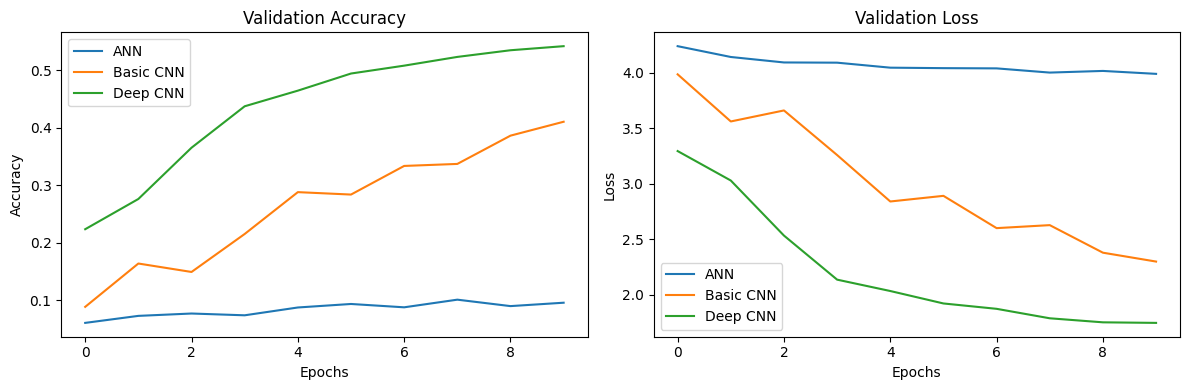

In [14]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# ---------- Accuracy ----------
axes[0].plot(ann_history.history['val_accuracy'])
axes[0].plot(cnn_history.history['val_accuracy'])
axes[0].plot(deep_cnn_history.history['val_accuracy'])
axes[0].set_title('Validation Accuracy')
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('Accuracy')
axes[0].legend(['ANN', 'Basic CNN', 'Deep CNN'])

# ---------- Loss ----------
axes[1].plot(ann_history.history['val_loss'])
axes[1].plot(cnn_history.history['val_loss'])
axes[1].plot(deep_cnn_history.history['val_loss'])
axes[1].set_title('Validation Loss')
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('Loss')
axes[1].legend(['ANN', 'Basic CNN', 'Deep CNN'])

plt.tight_layout()
plt.show()


**Deep CNN is identified to perform better both in low loss and high accuracy. Due to frequent automatic refresh in colab as well as time taken, only used 10 epochs. The model should perform better with more epochs as well as hypertuning of parameters. Goal of assigment is achieved by learning the concepts**

Accuracy: 55.14%
Precision: 55.14%
Recall: 55.14%
F1-score: 55.14%
(100, 100)


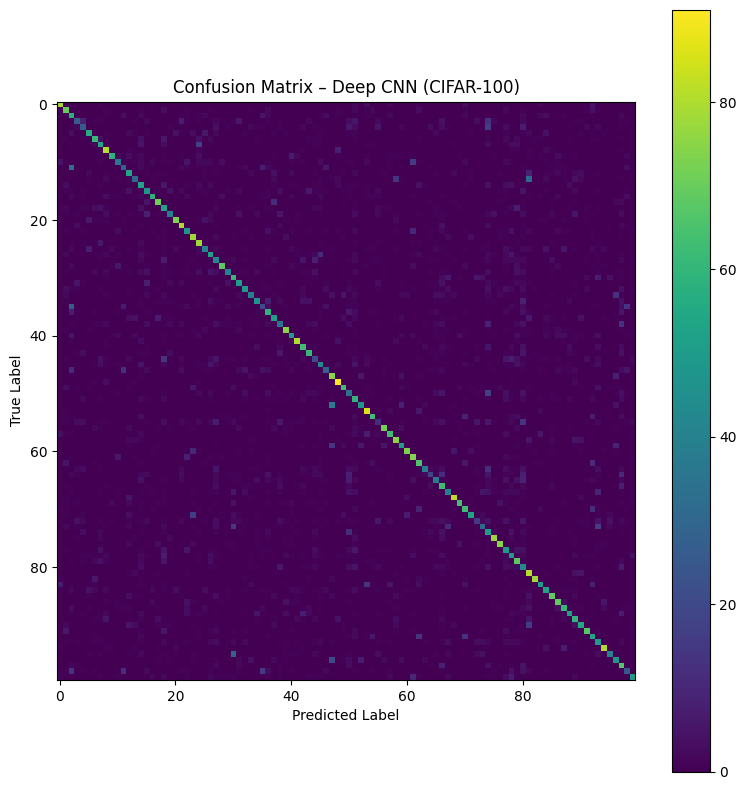

In [15]:
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Predict class probabilities
y_pred_prob = deep_cnn.predict(x_test, verbose=0)

# Convert to class labels
y_pred = np.argmax(y_pred_prob, axis=1)
y_true = np.argmax(y_test, axis=1)

#Accuracy
accuracy = np.mean(y_pred == y_true)
print(f"Accuracy: {accuracy * 100:.2f}%")


# Calculate precision
precision = np.mean(y_pred == y_true)

# calculate Recall
recall = np.mean(y_pred == y_true)

# Calculate F1-score
f1_score = 2 * (precision * recall) / (precision + recall)

print(f"Precision: {precision * 100:.2f}%")
print(f"Recall: {recall * 100:.2f}%")
print(f"F1-score: {f1_score * 100:.2f}%")

#Confusion matrix for just top 10 features
cm = confusion_matrix(y_true, y_pred)
print(cm.shape)   # (100, 100) for CIFAR-100

plt.figure(figsize=(8, 8))
plt.imshow(cm)
plt.title("Confusion Matrix – Deep CNN (CIFAR-100)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.colorbar()
plt.tight_layout()
plt.show()
